# Seeds Clustering
____

In this example, we would implement Unsupervised Learning techniques to cluster seeds into groups based on the attributes in the dataset.

You can download the dataset from : https://archive.ics.uci.edu/ml/datasets/seeds

To construct the data, seven geometric parameters of wheat kernels were measured: 

1. area A, 
2. perimeter P, 
3. compactness C = 4*pi*A/P^2, 
4. length of kernel, 
5. width of kernel, 
6. asymmetry coefficient 
7. length of kernel groove. 
8. The 3 Classes - three different varieties of wheat

All of these parameters are real-valued continuous.

In [51]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation, metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [2]:
cols = ['Area', 'Perimeter','Compactness','Kernel_Length','Kernel_Width','Assymetry_Coefficient','Kernel_Groove_Length', 'Class']

In [3]:
# read .csv from provided dataset
csv_filename="seeds_dataset.txt"

# df=pd.read_csv(csv_filename,index_col=0)
df=pd.read_csv(csv_filename,delim_whitespace=True,names=cols)

In [4]:
df.head()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Assymetry_Coefficient,Kernel_Groove_Length,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [5]:
features = df.columns[:-1]
features

Index(['Area', 'Perimeter', 'Compactness', 'Kernel_Length', 'Kernel_Width',
       'Assymetry_Coefficient', 'Kernel_Groove_Length'],
      dtype='object')

In [6]:
X = df[features]
y = df['Class']

In [7]:
X.head()

,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Assymetry_Coefficient,Kernel_Groove_Length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [8]:
# split dataset to 60% training and 40% testing
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)

In [10]:
X_train.shape, y_train.shape

((126, 7), (126,))

<hr>
# Unsupervised Learning
<hr>
## Feature Transformation

The first PCA dimension is the dimension in the data with highest variance. Intuitively, it corresponds to the 'longest' vector one can find in the 6-dimensional feature space that captures the data, that is, the eigenvector with the largest eigenvalue.
ICA, as opposed to PCA, finds the subcomponents that are statistically independent.

## PCA

In [11]:
y.unique()

array([1, 2, 3], dtype=int64)

In [12]:
len(features)

7

No of components will be equal to no of feature variables i.e. 7.

In [13]:
# Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=7) #7 components for 7 variables
pca.fit(X)

# Print the components and the amount of variance in the data contained in each dimension
print(pca.components_)
print(pca.explained_variance_ratio_)

[[ 0.8842285   0.39540542  0.00431132  0.12854448  0.11105914 -0.12761562
   0.1289665 ]
 [ 0.10080577  0.05648963 -0.00289474  0.03062173  0.00237229  0.98941048
   0.08223339]
 [ 0.26453354 -0.28251995  0.05903584 -0.40014946  0.31923869  0.06429754
  -0.76193973]
 [-0.19944949  0.57881686 -0.05776023  0.43610024 -0.23416358  0.02514736
  -0.61335659]
 [-0.13717297  0.57475603 -0.05310454 -0.78699776 -0.1448029  -0.00157564
   0.08765361]
 [ 0.28063956 -0.30155864 -0.04522905 -0.11343761 -0.89626785  0.003288
  -0.10992364]
 [ 0.02539824 -0.0658399  -0.99412565 -0.00143143  0.0815499  -0.00114269
  -0.00897193]]
[  8.29385197e-01   1.63632452e-01   5.65790880e-03   9.90306086e-04
   2.11180347e-04   1.20677139e-04   2.27879552e-06]


The explained variance is high for the first two dimensions, but drops significantly beginning with the third dimension. Thus, the first two components explain already 86.5 % of the variation in the data.

How many dimension to choose for the analysis really depends on the goal of the analysis. Even though PCA reduces the feature space (with all advantages that brings, such as faster computations) and makes interpreting the data easier for us by projecting them down to a lower dimension, it necessarily comes with a loss of information that may or may not be desired.

It the case at hand, assuming interpretation is the goal (creating seed clusters) and given the sharp drop of the explained variance after the second component, we would choose the first two dimensions for analysis.

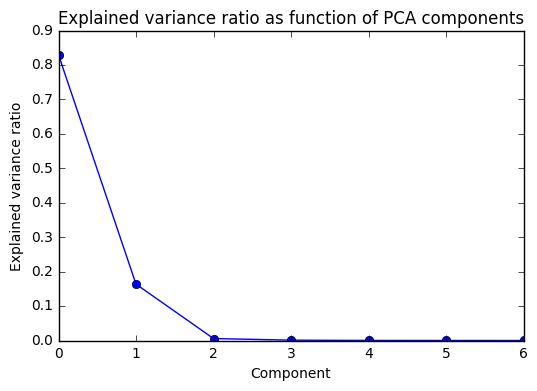

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(list(pca.explained_variance_ratio_),'-o')
plt.title('Explained variance ratio as function of PCA components')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component')
plt.show()

In [49]:
features

Index(['Area', 'Perimeter', 'Compactness', 'Kernel_Length', 'Kernel_Width',
       'Assymetry_Coefficient', 'Kernel_Groove_Length'],
      dtype='object')

The first dimension seems to basically represent only the 'Area'-feature, as this feature has a strong negative projection on the first dimension. The other features have rather weak (mostly negative) projections on the first dimension. That is, the first dimension basically tells us whether the 'area'-feature value is high or low, mixed with a little bit of information from the other features.

The second dimension is mainly represented by the features 'Perimeter' and 'Compactness', in the order of decreasing importance, and has rather low correlation with the other features. 

There are two main uses of this information. The first use is feature interpretation and hypothesis formation. We could form initial conjectures about the seed clusters contained in the data. One conjecture could be that the bulk of seeds can be split into clusters ordering mainly by 'Area wise' and seeds mainly ordering by 'Perimeter' and 'Compactness' from the datasource. The second use is that, given knowledge of the PCA components, new features can be engineered for further analysis of the problem. These features could be generated by applying an exact PCA-transformation or by using some heuristic based on the feature combinations recovered in PCA. 

## Applying PCA to visualize high-dimensional data

In [15]:
X = df[features].values
y= df['Class'].values
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X)

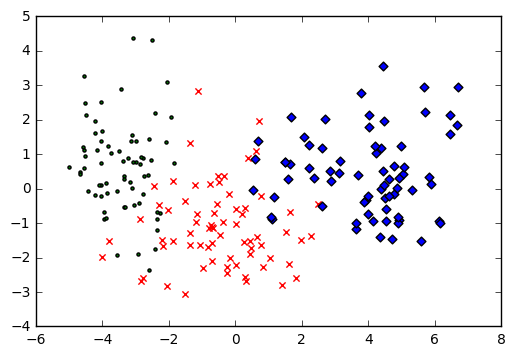

In [16]:
red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []

for i in range(len(reduced_X)):
    if y[i] == 1:
        red_x.append(reduced_X[i][0])
        red_y.append(reduced_X[i][1])
    elif y[i] == 2:
        blue_x.append(reduced_X[i][0])
        blue_y.append(reduced_X[i][1])
    else:
        green_x.append(reduced_X[i][0])
        green_y.append(reduced_X[i][1])

plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='D')
plt.scatter(green_x, green_y, c='g', marker='.')
plt.show()

## Clustering

In this section we will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then we will sample elements from the clusters to understand their significance.

### Choosing a Cluster Type

K Means Clustering or Gaussian Mixture Models?

Before discussing the advantages of K Means vs Gaussian Mixture models, it is helpful to observe that both methods are actually very similar. The main difference is that Gaussian Mixture models make a probabilistic assignment of points to classes depending on some distance metric, whereas K Means makes a deterministic assignment depending on some metric. Now, when the variance of the Gaussian mixtures is very small, this method becomes very similar to K Means, since the assignment probabilities to a specific cluster converge to 0 or 1 for any point in the domain. Because of the probabilistic assignment, Gaussian Mixtures (in contrast to K Means) are often characterized as soft clustering algorithms. 

An advantage of Gaussian Mixture models is that, if there is some a priori uncertainty about the assignment of a point to a cluster, this uncertainty is inherently reflected in the probabilistic model (soft assignment) and assignment probabilities can be computed for any data point after the model is trained. On the other hand, if a priori the clusters assignments are expected to be deterministic, K Means has advantages. An example would be a data generating process that actually is a mixture of Gaussians. Applying a Gaussian mixture model is more natural given this data generating process. When it comes to processing speed, the EM algorithm with Gaussian mixtures is generally slightly slower than Lloyd's algorithm for K Means, since computing the normal probability (EM) is generally slower than computing the L2-norm (K Means). A disadvantage of both methods is that they can get stuck in local minima (this can be considered as the cost of solving NP-hard problems (global min for k-means) approximately).

Since there is no strong indication that the data are generated from a mixture of normals (this assesment may be different given more information about the nature of the spending data) and the goal is to "hard"-cluster them (and not assign probabilities), I decided the use the general-purpose k-means algorithm.

A decision on the number of clusters will be made by visualizing the final clustering and deciding whether k equals the number of data centers found by visual inspection. Note that many other approaches for this task could be utilized, such as silhoutte analysis (see for example http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [17]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [18]:
# First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)
print(reduced_data[:10])  # print upto 10 elements

[[ 0.66344838 -1.41732098]
 [ 0.31566651 -2.68922915]
 [-0.6604993  -1.13150635]
 [-1.0552759  -1.62119002]
 [ 1.61999921 -2.18338442]
 [-0.47693801 -1.33649437]
 [-0.18483472 -0.15036441]
 [-0.78062962 -1.12979883]
 [ 2.2821081  -1.3600169 ]
 [ 1.97854147 -1.49468793]]


In [19]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit(reduced_data)
print(clusters)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [20]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [21]:
# Find the centroids for KMeans or the cluster means for GMM 

centroids = kmeans.cluster_centers_
print('*** K MEANS CENTROIDS ***')
print(centroids)

# TRANSFORM DATA BACK TO ORIGINAL SPACE FOR ANSWERING 7
print('*** CENTROIDS TRANSFERED TO ORIGINAL SPACE ***')
print(pca.inverse_transform(centroids))

*** K MEANS CENTROIDS ***
[[ 4.33639856  0.46609094]
 [-0.11491258 -1.08548863]
 [-3.32787801  0.64576148]]
*** CENTROIDS TRANSFERED TO ORIGINAL SPACE ***
[[ 18.72887568  16.3002505    0.88834498   6.20022594   3.74130716
    3.607964     6.00564981]
 [ 14.63649131  14.45252981   0.87364536   5.58052241   3.24326757
    2.64087177   5.30398814]
 [ 11.9700157   13.27990355   0.8547817    5.22052733   2.89054543
    4.76381335   5.03198981]]


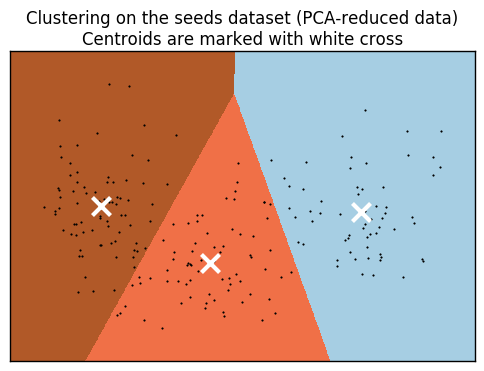

In [22]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the seeds dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

<hr>
## Elbow Method

### Using the elbow method to find the optimal number of clusters 

One of the main challenges in unsupervised learning is that we do not know the definitive answer. We don't have the ground truth class labels in our dataset that allow us to apply the techniques in order to evaluate the performance of a supervised model. Thus, in order to quantify the quality of clustering, we need to use intrinsic metrics—such as the within-cluster SSE (distortion) to compare the performance of different k-means clusterings. Conveniently, we don't need to compute the within-cluster SSE explicitly as it is already accessible via the inertia_ attribute after fitting a KMeans model.

Based on the within-cluster SSE, we can use a graphical tool, the so-called elbow method, to estimate the optimal number of clusters k for a given task. Intuitively,
we can say that, if k increases, the distortion will decrease. This is because the
samples will be closer to the centroids they are assigned to. The idea behind the elbow method is to identify the value of k where the distortion begins to increase most rapidly, which will become more clear if we plot distortion for different
values of k:

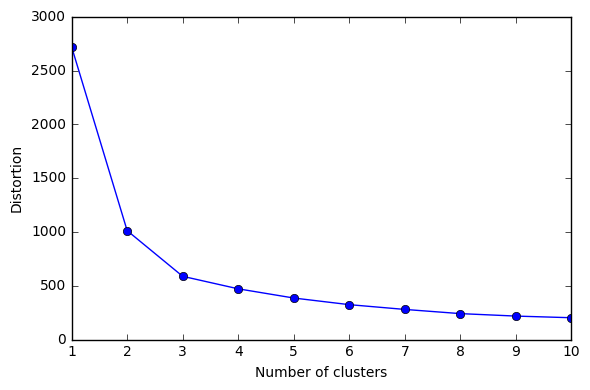

In [23]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions .append(km.inertia_)
plt.plot(range(1,11), distortions , marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('./figures/elbow.png', dpi=300)
plt.show()

As we can see in the following plot, the elbow is located at k = 3, which provides evidence that k = 3 is indeed a good choice for this dataset.

## Quantifying the quality of clustering via silhouette plots

Another intrinsic metric to evaluate the quality of a clustering is silhouette analysis, which can also be applied to clustering algorithms other than k-means that we will discuss later in this chapter. Silhouette analysis can be used as a graphical tool to plot a measure of how tightly grouped the samples in the clusters are. To calculate the silhouette coefficient of a single sample in our dataset, we can apply the following three steps:
1. Calculate the cluster cohesion a(i) as the average distance between a sample x(i) and all other points in the same cluster.
2. Calculate the cluster separation b(i) from the next closest cluster as the average distance between the sample x(i) and all samples in the nearest cluster.
3. Calculate the silhouette s(i) as the difference between cluster cohesion and separation divided by the greater of the two as shown : 

s(i) = b(i) - a(i) / max(b(i),a(i))

The silhouette coefficient is bounded in the range -1 to 1. Based on the preceding formula, we can see that the silhouette coefficient is 0 if the cluster separation and cohesion are equal (b(i)=a(i)). Furthermore, we get close to an ideal silhouette coefficient of 1 if (b(i)>>a(i)) since b(i) quantifies how dissimilar a sample is to other clusters, and a(i) tells us how similar it is to the other samples in its own cluster, respectively.
The silhouette coefficient is available as silhouette_samples from scikit-learn's metric module, and optionally the silhouette_scores can be imported. This calculates the average silhouette coefficient across all samples, which is equivalent to numpy.mean(silhouette_samples(…)). By executing the following code, we will now create a plot of the silhouette coefficients for a k-means clustering with k=3:


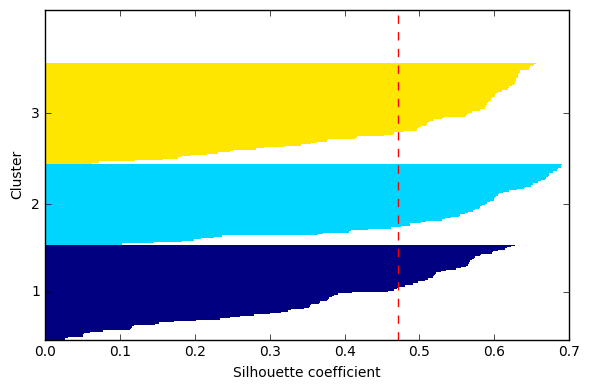

In [24]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
            edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

Our clustering with 3 centroids is good.

___
## Applying agglomerative clustering via scikit-learn

In this section, we saw how to perform agglomerative hierarchical clustering
using SciPy. However, there is also an AgglomerativeClustering implementation in scikit-learn, which allows us to choose the number of clusters that we want to return. This is useful if we want to prune the hierarchical cluster tree. By setting
the n_cluster parameter to 3, we will now cluster the samples into three groups using the complete linkage approach based on the Euclidean distance metric:

In [25]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 0 2 2 2 2 2 2
 2 2 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 2 2 0 2 2 2 1
 2 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 2 1 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


___

In [26]:
from sklearn.cross_validation import train_test_split
X = df[features]
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.25, random_state=42)

<hr>
## Clustering using K Means:

In [28]:
from sklearn import cluster
clf = cluster.KMeans(init='k-means++', n_clusters=3, random_state=5)
clf.fit(X_train)
print( clf.labels_.shape)
print (clf.labels_)

(157,)
[0 1 0 0 0 0 0 1 0 2 2 2 1 1 0 0 0 0 0 2 2 1 0 2 1 2 0 1 2 0 0 1 1 0 0 2 0
 2 2 2 2 1 0 2 1 0 0 2 0 0 1 1 0 0 1 0 1 0 0 2 1 2 1 2 0 1 1 1 1 0 1 1 2 1
 0 0 0 0 2 0 1 1 2 1 1 0 2 1 0 1 0 2 0 0 1 1 1 0 2 0 0 2 2 2 1 1 2 0 0 0 1
 2 0 1 2 1 0 1 1 1 0 2 0 1 1 1 0 0 2 0 0 1 1 2 2 1 1 0 0 1 2 1 2 2 2 2 2 2
 1 0 1 2 2 0 2 0 2]


In [29]:
# Predict clusters on testing data
y_pred = clf.predict(X_test)

In [30]:
from sklearn import metrics
print ("Addjusted rand score:{:.2}".format(metrics.adjusted_rand_score(y_test, y_pred)))
print ("Homogeneity score:{:.2} ".format(metrics.homogeneity_score(y_test, y_pred)) )
print ("Completeness score: {:.2} ".format(metrics.completeness_score(y_test, y_pred)))
print ("Confusion matrix")
print (metrics.confusion_matrix(y_test, y_pred))

Addjusted rand score:0.71
Homogeneity score:0.69 
Completeness score: 0.69 
Confusion matrix
[[ 0  0  0  0]
 [11  3  0  0]
 [ 2  0 16  0]
 [ 1 20  0  0]]


<hr>
## Affinity Propogation

In [33]:
# Affinity propagation
aff = cluster.AffinityPropagation()
aff.fit(X_train)
print (aff.cluster_centers_indices_.shape)

(10,)


In [34]:
y_pred = aff.predict(X_test)

In [36]:
from sklearn import metrics
print ("Addjusted rand score:{:.2}".format(metrics.adjusted_rand_score(y_test, y_pred)))
print ("Homogeneity score:{:.2} ".format(metrics.homogeneity_score(y_test, y_pred)) )
print ("Completeness score: {:.2} ".format(metrics.completeness_score(y_test, y_pred)))
print ("Confusion matrix")
print (metrics.confusion_matrix(y_test, y_pred))

Addjusted rand score:0.31
Homogeneity score:0.84 
Completeness score: 0.42 
Confusion matrix
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 2 4 0 0 1 0 7 0]
 [5 7 1 0 0 1 0 0 0 4]
 [0 0 0 2 3 0 9 7 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


<hr>
## MeanShift

In [38]:
ms = cluster.MeanShift()
ms.fit(X_train)
print( ms.cluster_centers_)

[[ 12.90285714  13.6938961    0.86236364   5.35018182   3.01996104
    3.46636364   5.0844026 ]
 [ 17.32053571  15.67982143   0.88386429   5.98578571   3.57646429
    3.34401786   5.801875  ]]


In [39]:
y_pred = ms.predict(X_test)

In [40]:
from sklearn import metrics
print ("Addjusted rand score:{:.2}".format(metrics.adjusted_rand_score(y_test, y_pred)))
print ("Homogeneity score:{:.2} ".format(metrics.homogeneity_score(y_test, y_pred)) )
print ("Completeness score: {:.2} ".format(metrics.completeness_score(y_test, y_pred)))
print ("Confusion matrix")
print (metrics.confusion_matrix(y_test, y_pred))

Addjusted rand score:0.55
Homogeneity score:0.51 
Completeness score: 0.84 
Confusion matrix
[[ 0  0  0  0]
 [12  2  0  0]
 [ 0 18  0  0]
 [21  0  0  0]]


<hr>
## Mixture of Guassian Models

In [44]:
from sklearn import mixture

# Define a heldout dataset to estimate covariance type
X_train_heldout, X_test_heldout, y_train_heldout, y_test_heldout = train_test_split(
        X_train, y_train,test_size=0.25, random_state=42)
for covariance_type in ['spherical','tied','diag','full']:
    gm=mixture.GMM(n_components=3, covariance_type=covariance_type, random_state=42, n_init=5)
    gm.fit(X_train_heldout)
    y_pred=gm.predict(X_test_heldout)
    print ("Adjusted rand score for covariance={}:{:.2}".format(covariance_type, 
                                                               metrics.adjusted_rand_score(y_test_heldout, y_pred)))

Adjusted rand score for covariance=spherical:0.63
Adjusted rand score for covariance=tied:0.85
Adjusted rand score for covariance=diag:0.65
Adjusted rand score for covariance=full:0.69


In [45]:
gm = mixture.GMM(n_components=3, covariance_type='tied', random_state=42)
gm.fit(X_train)

GMM(covariance_type='tied', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=42,
  tol=0.001, verbose=0)

In [47]:
# Print train clustering and confusion matrix
y_pred = gm.predict(X_test)
print ("Addjusted rand score:{:.2}".format(metrics.adjusted_rand_score(y_test, y_pred)))
print ("Homogeneity score:{:.2} ".format(metrics.homogeneity_score(y_test, y_pred)) )
print ("Completeness score: {:.2} ".format(metrics.completeness_score(y_test, y_pred)))

print ("Confusion matrix")
print (metrics.confusion_matrix(y_test, y_pred))

Addjusted rand score:0.94
Homogeneity score:0.94 
Completeness score: 0.93 
Confusion matrix
[[ 0  0  0  0]
 [ 0  0 14  0]
 [ 0 18  0  0]
 [20  0  1  0]]


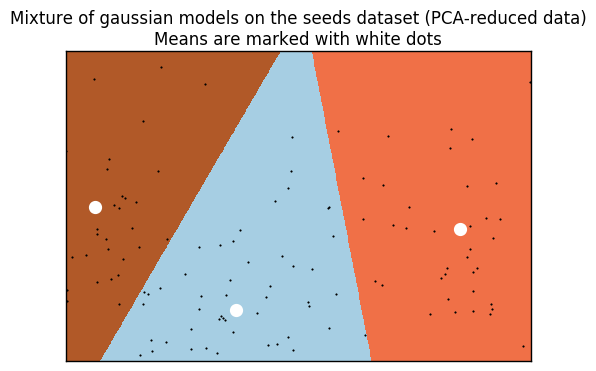

In [48]:
pl=plt
from sklearn import decomposition
# In this case the seeding of the centers is deterministic,
# hence we run the kmeans algorithm only once with n_init=1

pca = decomposition.PCA(n_components=2).fit(X_train)
reduced_X_train = pca.transform(X_train)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will asign a color to each
x_min, x_max = reduced_X_train[:, 0].min() + 1, reduced_X_train[:, 0].max() - 1
y_min, y_max = reduced_X_train[:, 1].min() + 1, reduced_X_train[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

gm.fit(reduced_X_train)
#print np.c_[xx.ravel(),yy.ravel()]
Z = gm.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1)
pl.clf()
pl.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=pl.cm.Paired,
          aspect='auto', origin='lower')
#print reduced_X_train.shape

pl.plot(reduced_X_train[:, 0], reduced_X_train[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = gm.means_

pl.scatter(centroids[:, 0], centroids[:, 1],
           marker='.', s=169, linewidths=3,
           color='w', zorder=10)

pl.title('Mixture of gaussian models on the seeds dataset (PCA-reduced data)\n'
         'Means are marked with white dots')
pl.xlim(x_min, x_max)
pl.ylim(y_min, y_max)
pl.xticks(())
pl.yticks(())
pl.show()

___
### Summary

Thus we looked at another unsupervised learning examples where we clustered seed based on its properties. Feel free to search similar datasets from UCI ML repository or any other sources you would like and apply these codes to them. This way you would get a better understanding of how and when to apply unsupervised learning techniques on different datasets.


___